In [1]:
import numpy as np 

In [2]:
import imblearn as imn

In [3]:
import pandas as pd

In [4]:
from matplotlib import pyplot as plt

In [5]:
import sklearn.metrics as metrics

In [6]:
import seaborn as sns


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
FD=pd.read_csv('F:\Default.csv')

In [9]:
FD.head()

,default,student,balance,income
0,no,yes,750.1111,44987.311
1,no,yes,333.1300,9974.258
2,no,yes,555.5635,9444.520
3,no,yes,750.1111,3355.780
4,no,yes,333.1300,65854.000


In [10]:
FD.tail()

,default,student,balance,income
1383,yes,no,333.1300,3355.780
1384,yes,no,555.5635,65854.000
1385,yes,no,750.1111,6274.255
1386,yes,no,333.1300,363552.000
1387,yes,no,555.5635,75242.580


In [11]:
FD.shape

(1388, 4)

In [12]:
FD.describe()

,balance,income
count,1388.000000,1388.000000
mean,1324.371077,70190.088539
std,2459.903443,98437.275632
min,0.000000,3355.780000
25%,333.130000,9444.520000
50%,555.563500,45383.580000
75%,754.865000,65854.000000
max,9458.645000,363552.000000


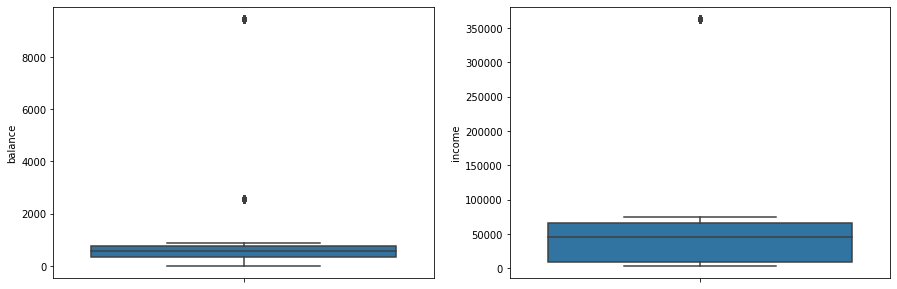

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=FD['balance'])

plt.subplot(1,2,2)
sns.boxplot(y=FD['income'])
plt.show()

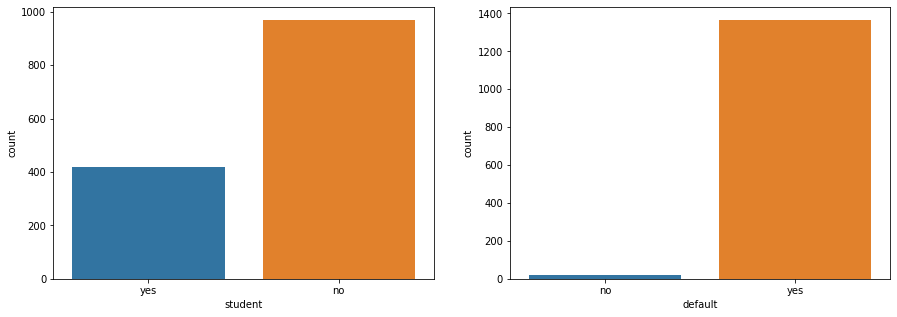

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(FD['student'])

plt.subplot(1,2,2)
sns.countplot(FD['default'])
plt.show()

In [15]:
FD["student"].value_counts()

no     969
yes    419
Name: student, dtype: int64

In [16]:
FD["default"].value_counts()

yes    1366
no       22
Name: default, dtype: int64

In [17]:
FD["student"].value_counts(normalize=True)

no     0.698127
yes    0.301873
Name: student, dtype: float64

In [18]:
FD["default"].value_counts(normalize=True)

yes    0.98415
no     0.01585
Name: default, dtype: float64

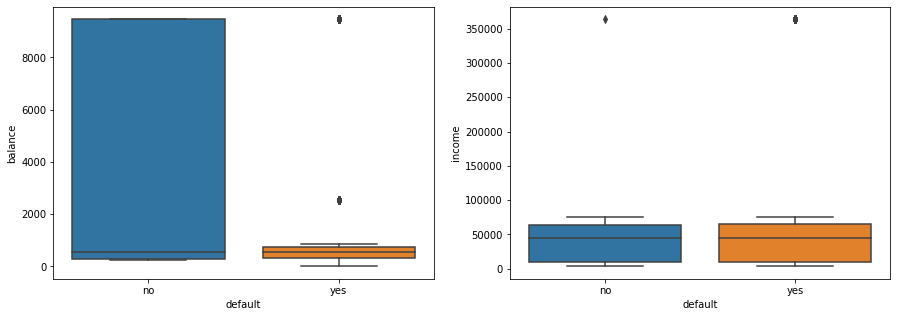

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(FD['default'],FD['balance'])

plt.subplot(1,2,2)
sns.boxplot(FD['default'],FD['income'])
plt.show()

In [20]:
pd.crosstab(FD['student'],FD['default'],normalize='index').round(2)

default,no,yes
student,,
no,0.00,1.00
yes,0.05,0.95


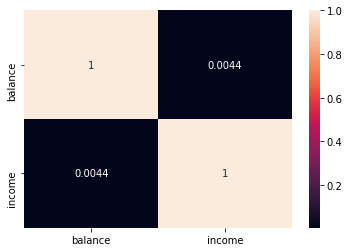

In [21]:
sns.heatmap(FD[['balance','income']].corr(),annot=True)

In [22]:
FD.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [23]:
Q1,Q3=FD['balance'].quantile([0.25,0.75])
IQR=Q3-Q1
LL=Q1-1.5*(IQR)
UL=Q3+1.5*(IQR)

In [24]:
UL

1387.4675

In [25]:
fd=FD[FD['balance']>UL]

In [26]:
 fd

,default,student,balance,income
6,no,yes,9458.6450,363552.0000
7,no,yes,9456.6840,75242.5800
11,yes,yes,9458.6450,52757.5700
12,yes,yes,9456.6840,55698.4560
23,yes,no,9458.6450,25863.4475
...,...,...,...,...
1335,yes,yes,9458.6450,45383.5800
1336,no,yes,9456.6840,56874.5200
1347,yes,yes,2545.8678,3355.7800
1360,yes,yes,2545.8678,75242.5800


In [27]:
fd['default'].value_counts()

yes    173
no       7
Name: default, dtype: int64

In [28]:
fd['default'].count()

180

In [29]:
fd['default'].value_counts(normalize=True)

yes    0.961111
no     0.038889
Name: default, dtype: float64

In [30]:
FD['balance']=np.where(FD['balance']>UL,UL,FD['balance'])

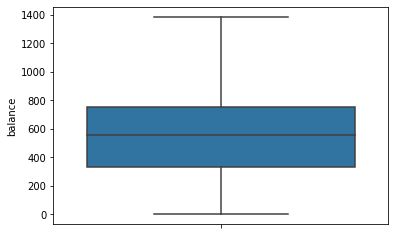

In [31]:
sns.boxplot(y=FD['balance'])
plt.show()

In [32]:
FD=pd.get_dummies(FD,drop_first=True)

In [33]:
FD.head()

,balance,income,default_yes,student_yes
0,750.1111,44987.311,0,1
1,333.1300,9974.258,0,1
2,555.5635,9444.520,0,1
3,750.1111,3355.780,0,1
4,333.1300,65854.000,0,1


In [34]:
FD.columns=['balance','income','default','student']

In [35]:
FD.head()

,balance,income,default,student
0,750.1111,44987.311,0,1
1,333.1300,9974.258,0,1
2,555.5635,9444.520,0,1
3,750.1111,3355.780,0,1
4,333.1300,65854.000,0,1


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x=FD.drop('default',axis=1)
y=FD['default']

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)

In [39]:
print(x_train.shape)
print(x_test.shape)

(971, 3)
(417, 3)


In [40]:
print(y_train.value_counts(normalize=True).round(2))
print(y_test.value_counts(normalize=True).round(2))

1    0.98
0    0.02
Name: default, dtype: float64
1    0.98
0    0.02
Name: default, dtype: float64


In [41]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=33, sampling_strategy=0.75)
x_res,y_res=sm.fit_resample(x_train,y_train)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr=LogisticRegression()

In [44]:
lr.fit(x_res,y_res)

LogisticRegression()

In [45]:
y_pred=lr.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix,classification_report

In [47]:
confusion_matrix(y_test,y_pred)

array([[  4,   3],
       [ 95, 315]], dtype=int64)

In [48]:
(2+327)/(2+327+5+83)

0.7889688249400479